In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from mtcnn.mtcnn import MTCNN
from matplotlib.patches import Rectangle

In [2]:
# draw an image with detected objects
def draw_image_with_boxes(data, result_list):
    # plot the image
    plt.imshow(data)
    # get the context for drawing boxes
    ax = plt.gca()
    # plot each box
    for result in result_list:
        # get coordinates
        x, y, width, height = result['box']
        # create the shape
        rect = Rectangle((x, y), width, height, fill=False, color='red')
        # draw the box
        ax.add_patch(rect)
    # show the plot
    plt.show()

def load_lfw_data(test_size=0.2, random_state=42):
    download_folder = Path("../data/external/lfw-dataset")
    lfw_people = fetch_lfw_people(color=True, resize=0.5, funneled=True, download_if_missing=True, data_home=download_folder)
    X = lfw_people.images
    y = lfw_people.target
    #X = normalize_image(X)  # Normalize pixel values
    y = LabelEncoder().fit_transform(y)  # Encode labels
    target_names = lfw_people.target_names

    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=test_size, random_state=random_state)#, stratify=y)

    return X_train, X_val, y_train, y_val, target_names    

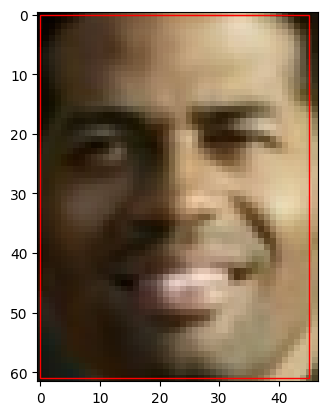

In [3]:
X_train, X_test, y_train, y_test, target_names = load_lfw_data()

detector = MTCNN()
# detect faces in the image
image = X_train[0]
if image.dtype != np.uint8:
    image = (image * 255).astype(np.uint8)
if image.shape[-1] != 3:
    image = np.stack([image.squeeze()] * 3, axis=-1)
results = detector.detect_faces(image)
results
draw_image_with_boxes(image, results)